# Librerias

In [30]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lectura de dataset y EDA

In [31]:
# Lectura de dataset
pd.set_option('display.max_columns', 100)
df = pd.read_csv("/content/dataset.csv")

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Tamaño del dataset

In [43]:
df.shape

(4424, 35)

Tipos de variables del dataset

In [44]:
df.dtypes

,0
Marital status,float64
Application mode,float64
Application order,float64
Course,float64
Daytime/evening attendance,float64
Previous qualification,float64
Nacionality,float64
Mother's qualification,float64
Father's qualification,float64
Mother's occupation,float64


# valores faltantes

In [32]:
# valores fdaltantes
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Se puede observar que no tenemos valores faltantes pero si es que hubiera se trataria a travez de la mediana para valores numericos y la moda para los valores categoricos.

# filas duplicadas

In [33]:
#filas duplicadas
print(df.duplicated().sum())

0


Se puede observar que no tenemos filas duplicadas en el dataset, pero si lo tuvieramos se trataria a travez de la eliminacion de las filas duplicadas.

# valores atipicos

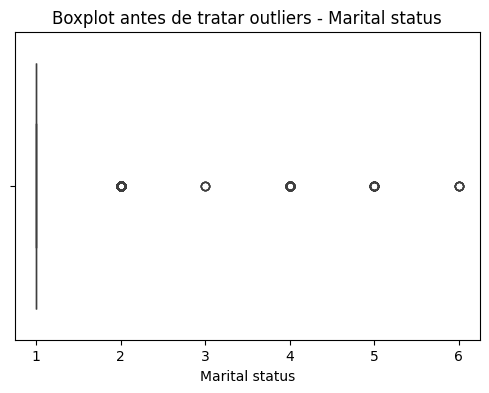

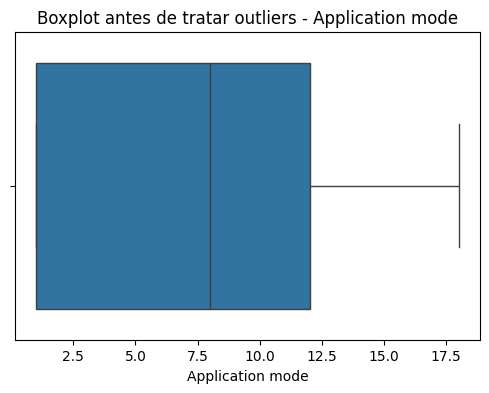

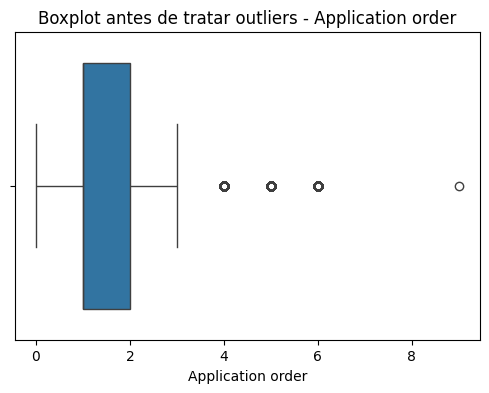

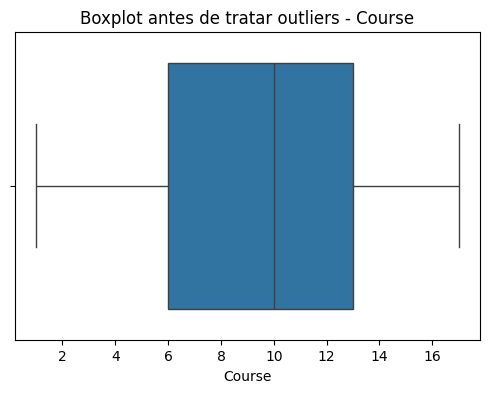

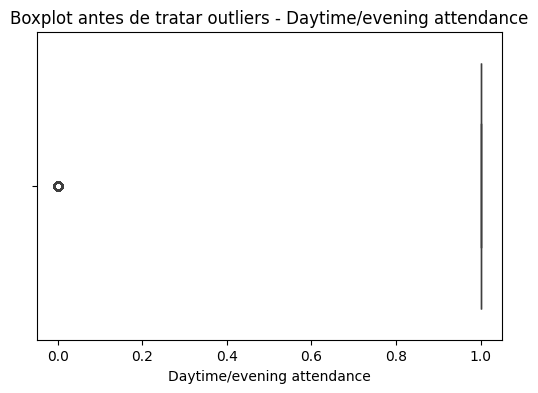

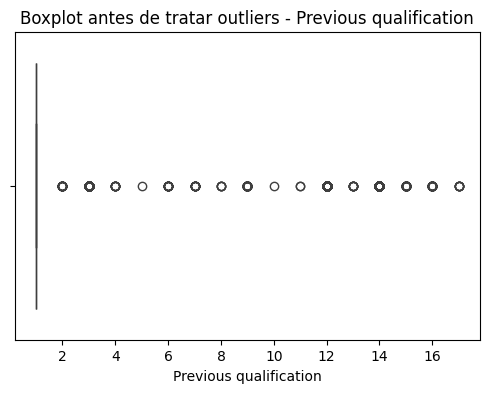

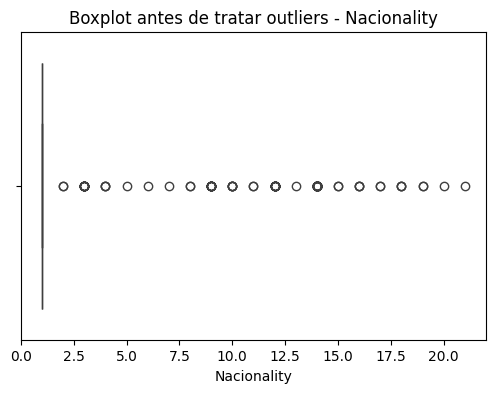

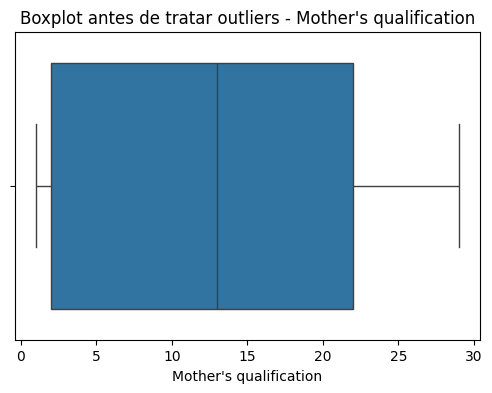

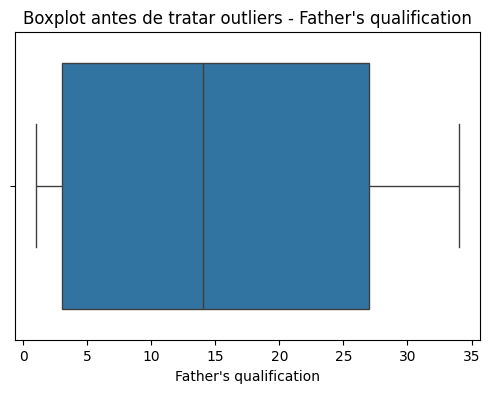

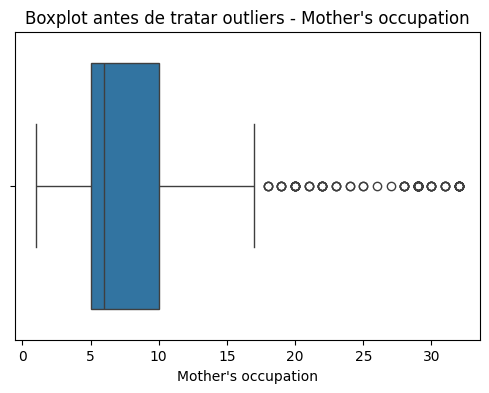

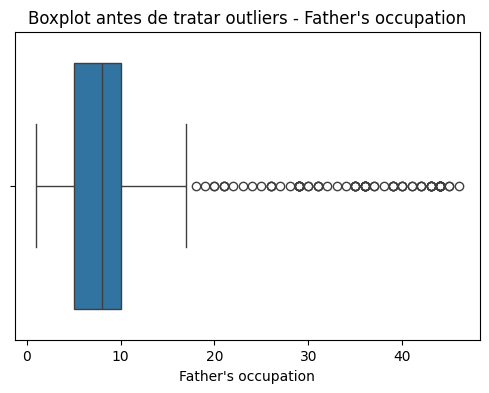

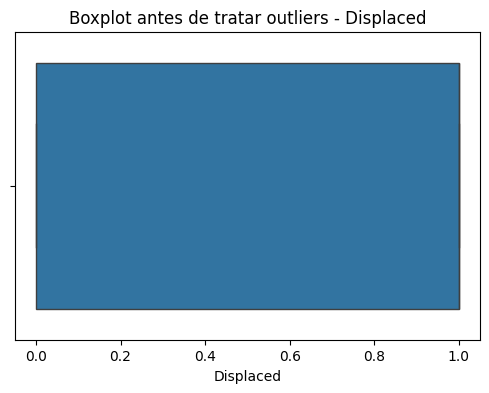

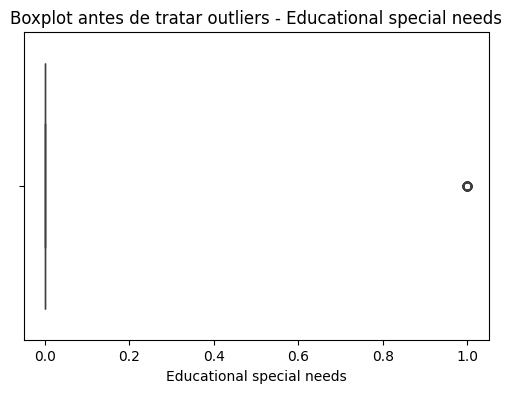

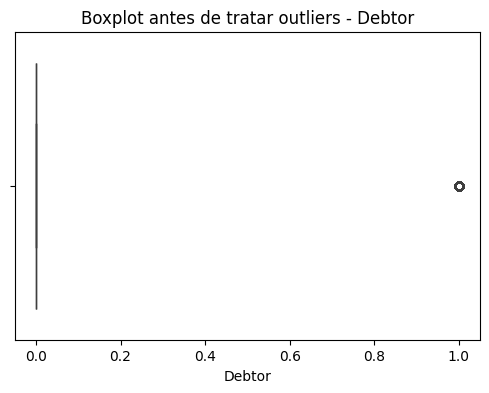

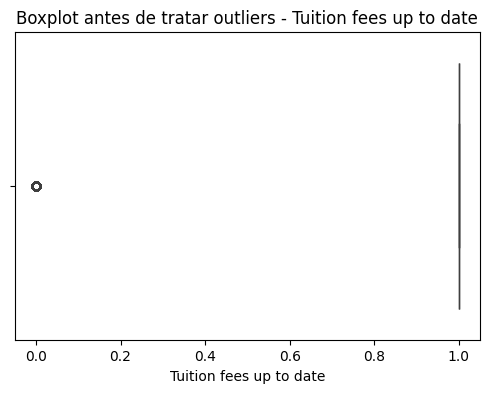

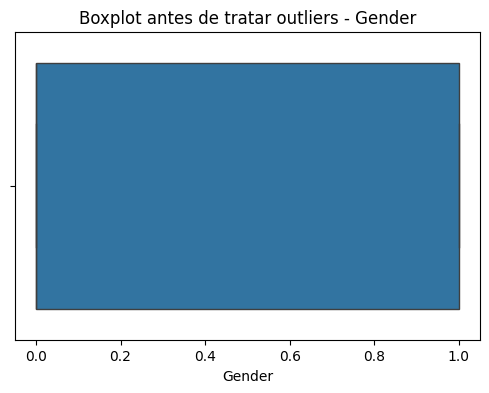

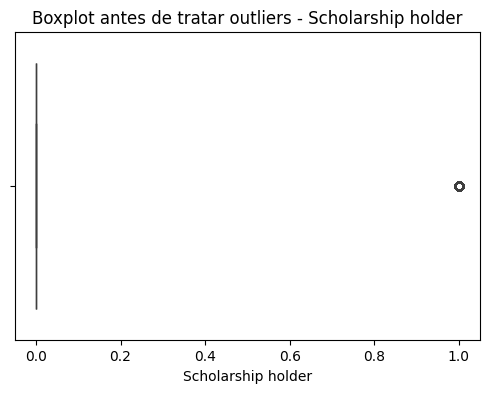

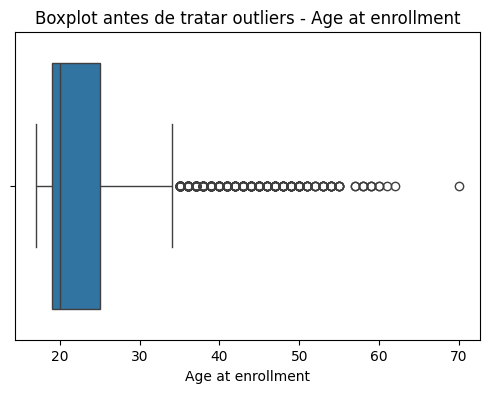

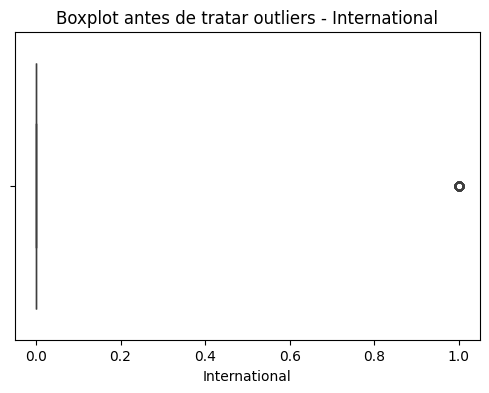

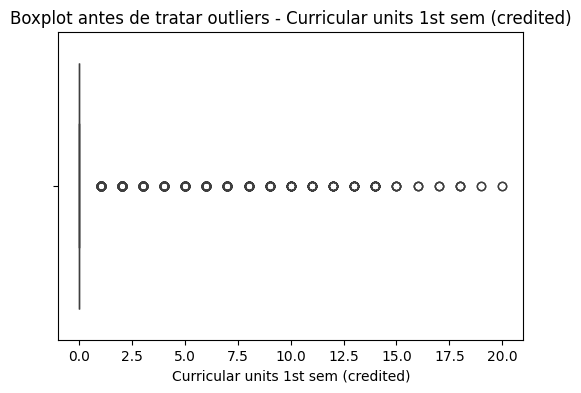

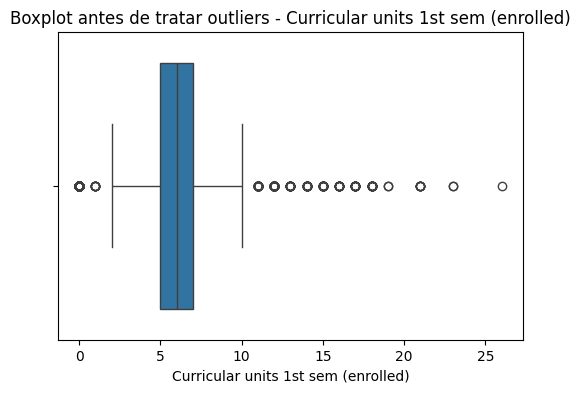

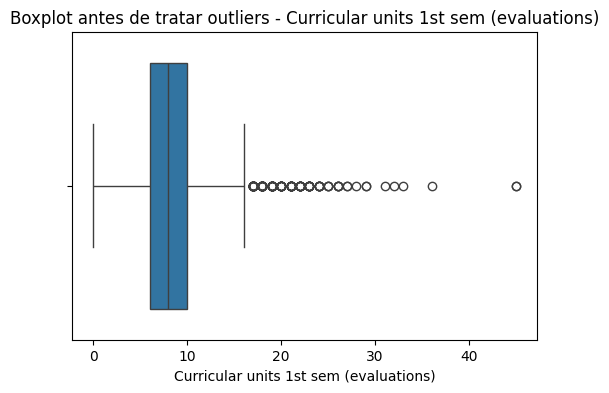

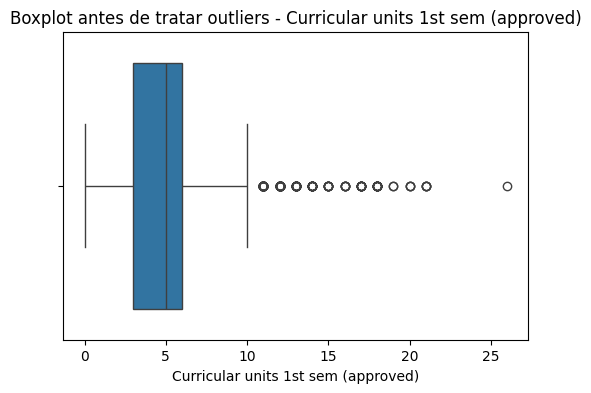

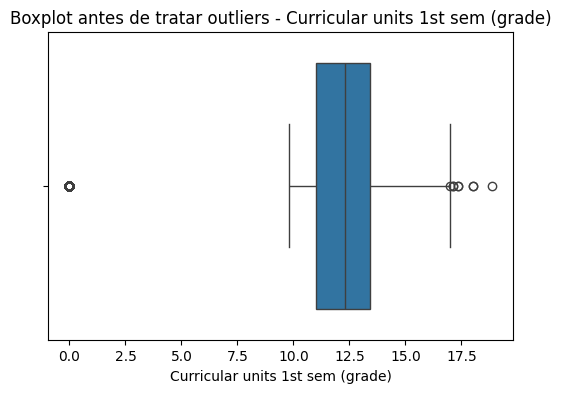

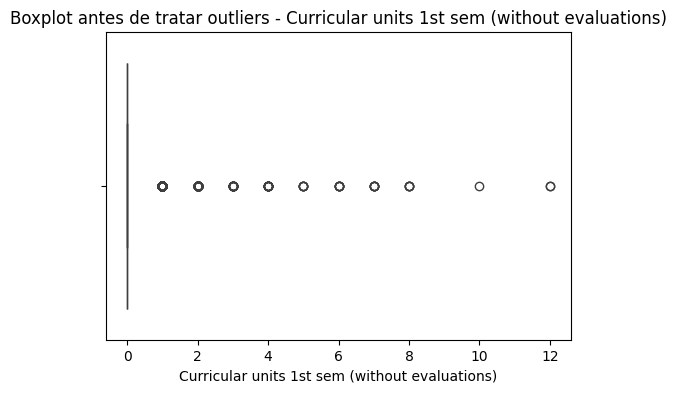

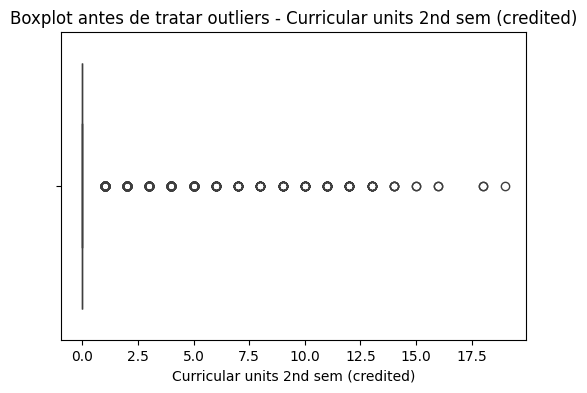

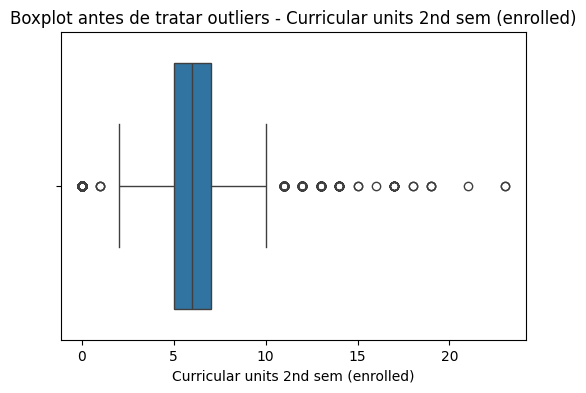

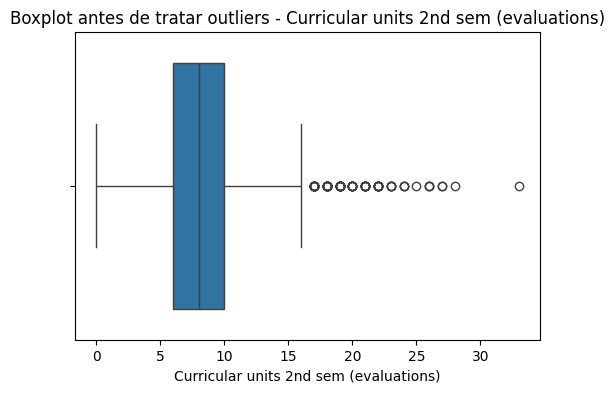

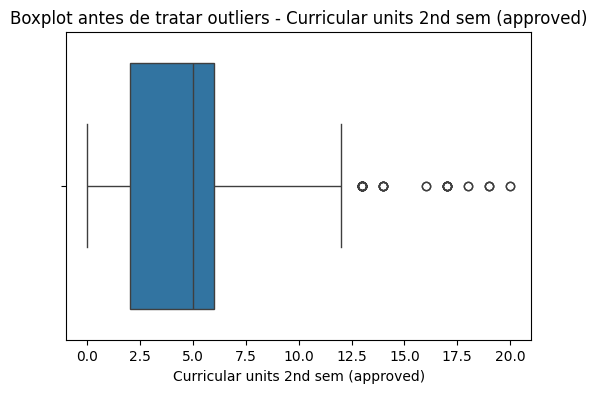

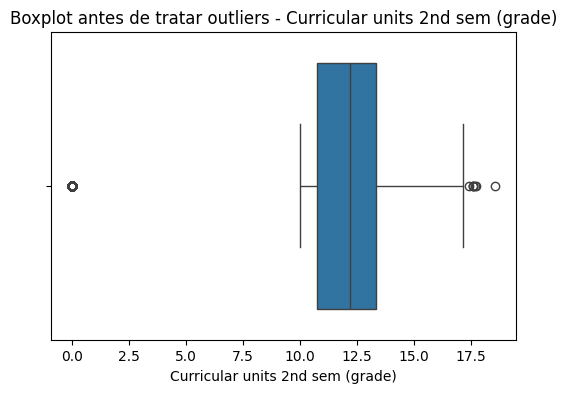

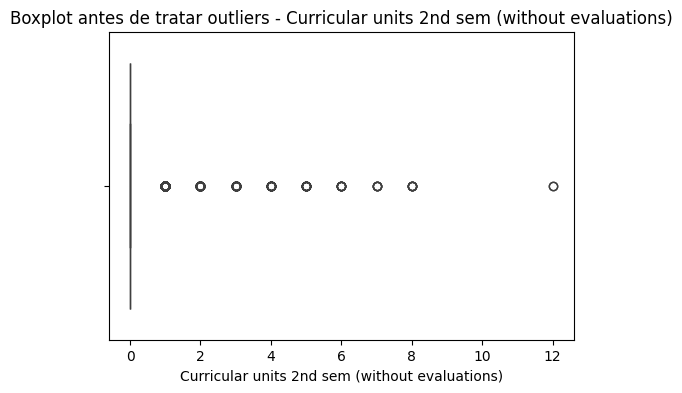

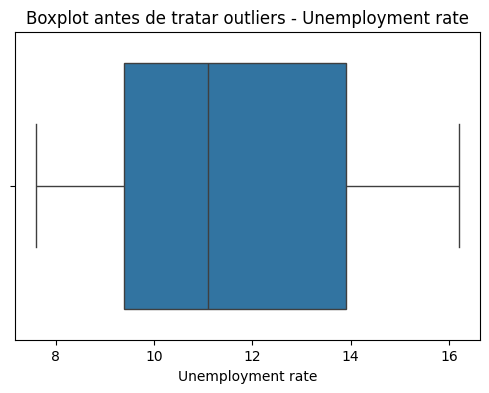

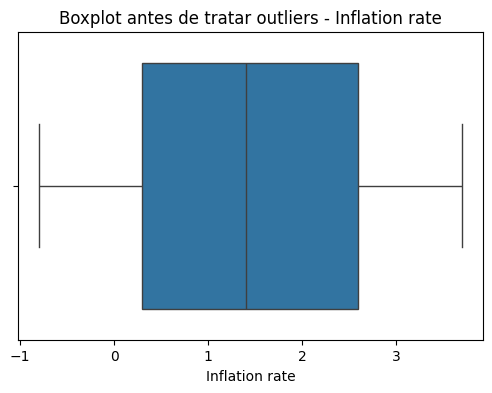

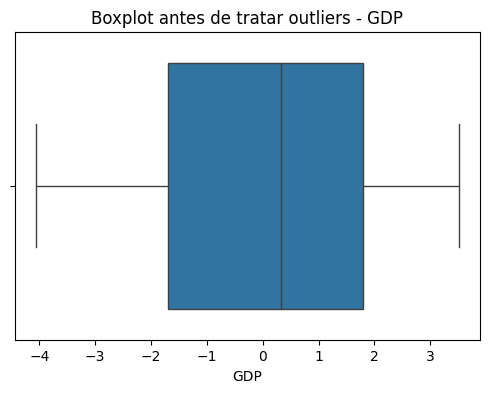

In [34]:
# Valores atipicos
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot antes de tratar outliers - {col}")
    plt.show()

Se puede observar que algunas columnas si tienen valores atipicos.

Tratamos los valores atipicos con IQR y reemplazxamos los valores fuera de rango por los limites

In [35]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))


Visualizamos otra ves las columnas

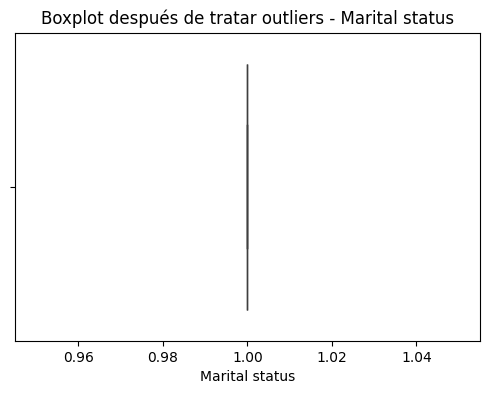

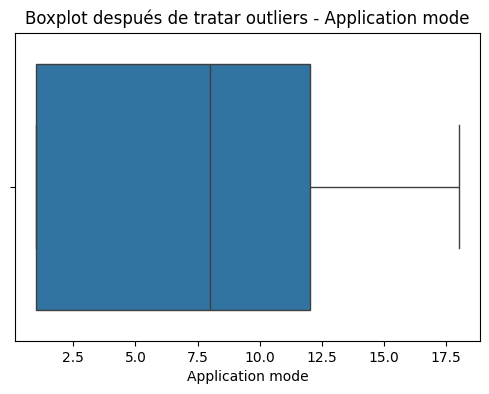

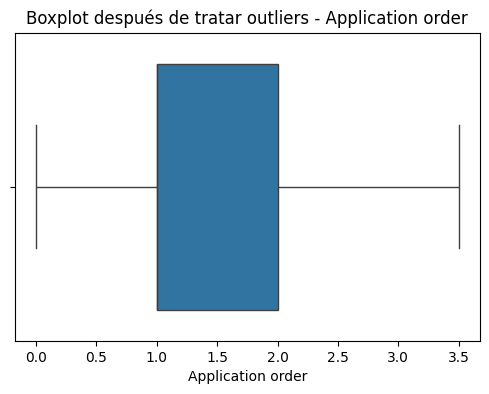

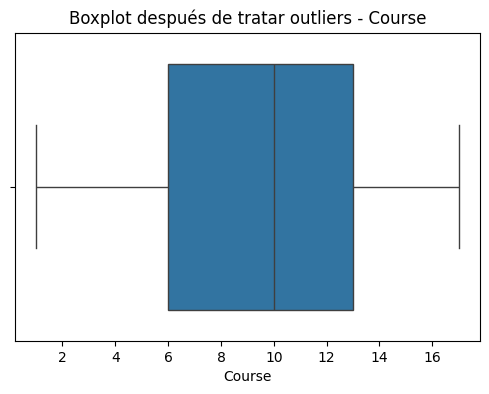

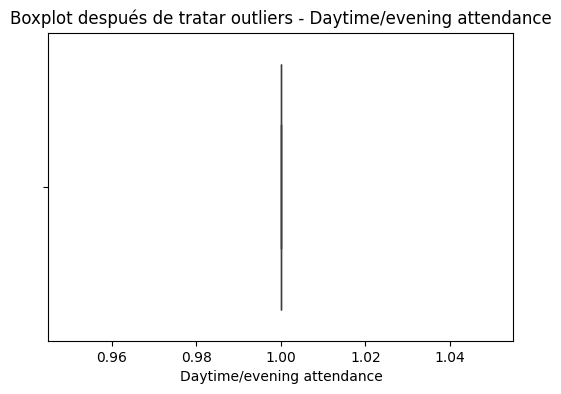

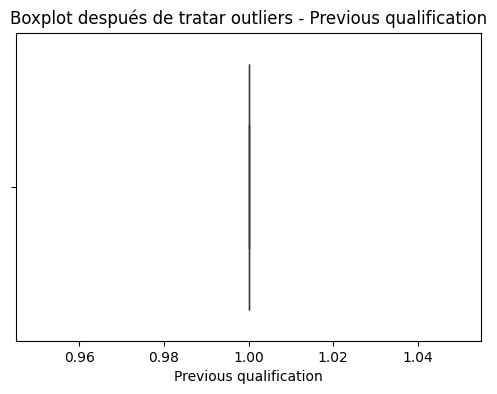

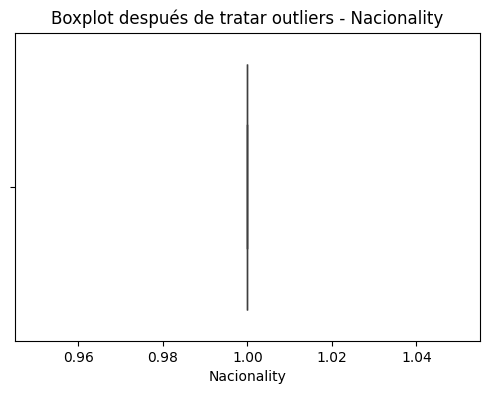

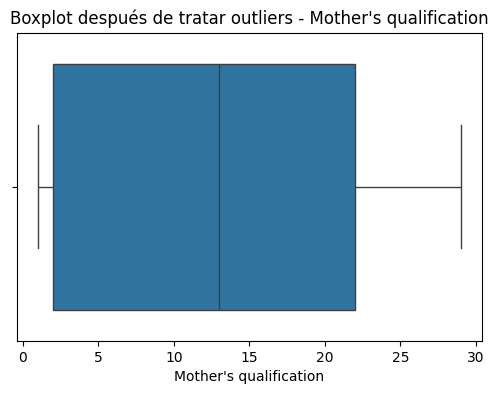

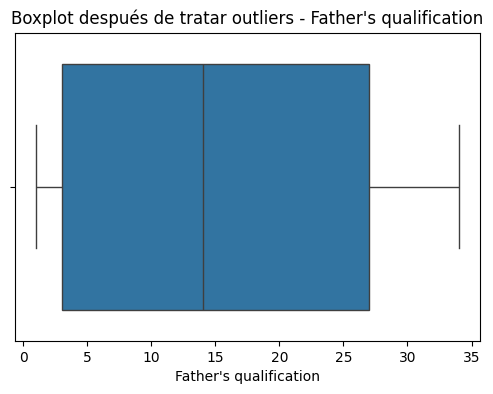

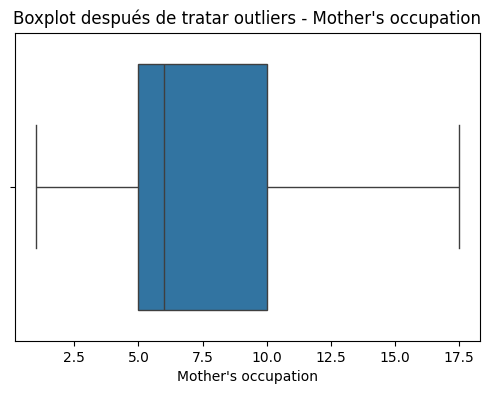

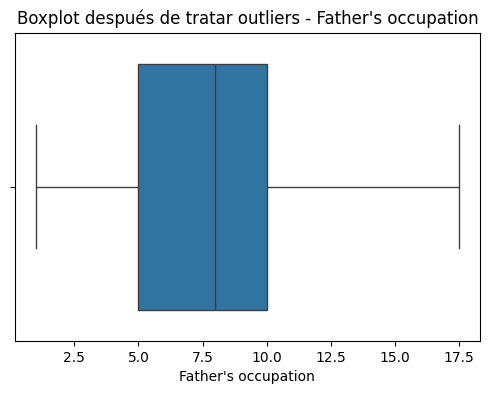

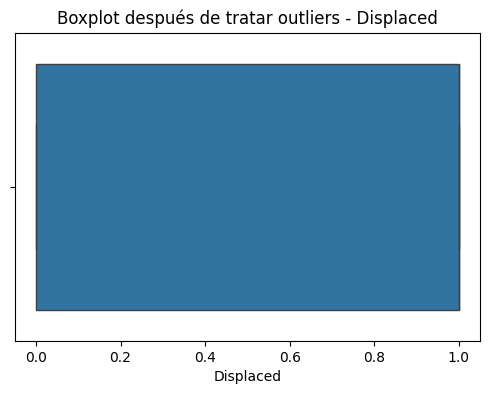

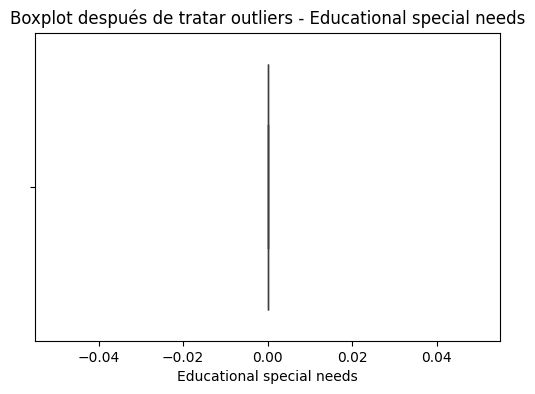

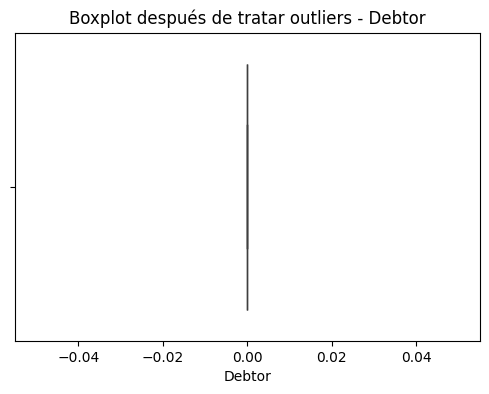

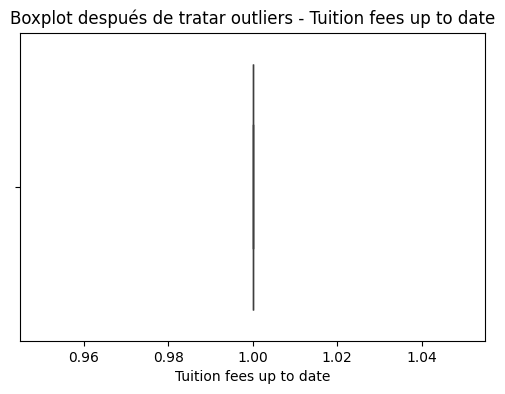

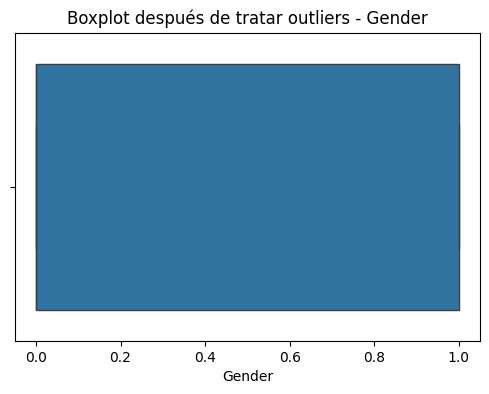

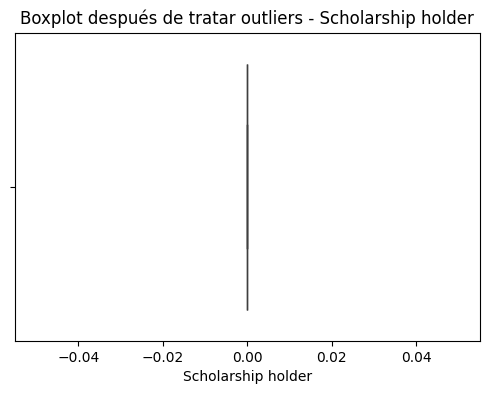

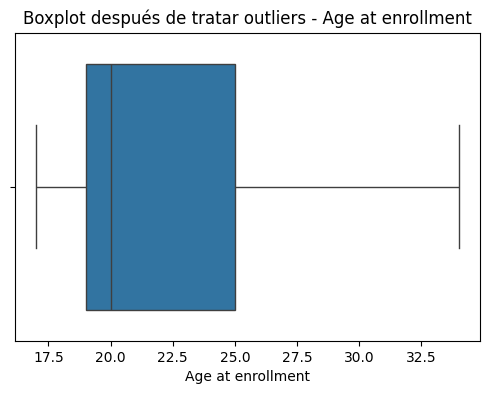

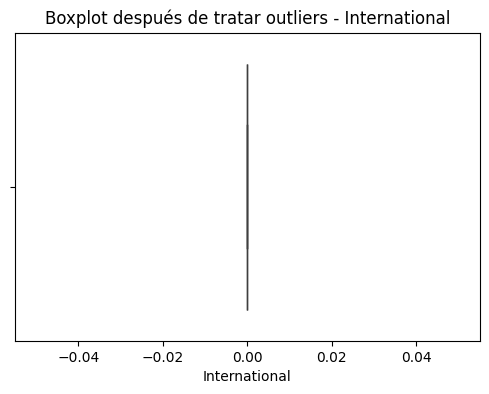

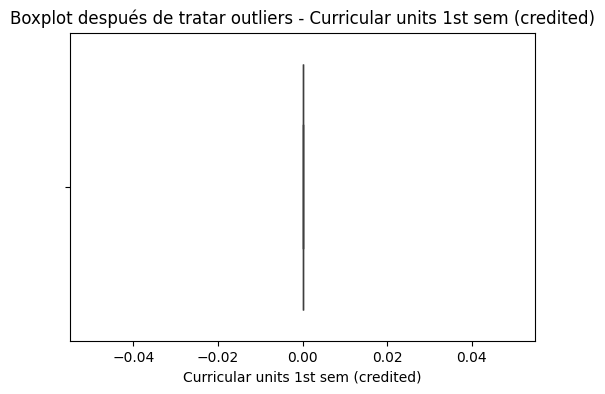

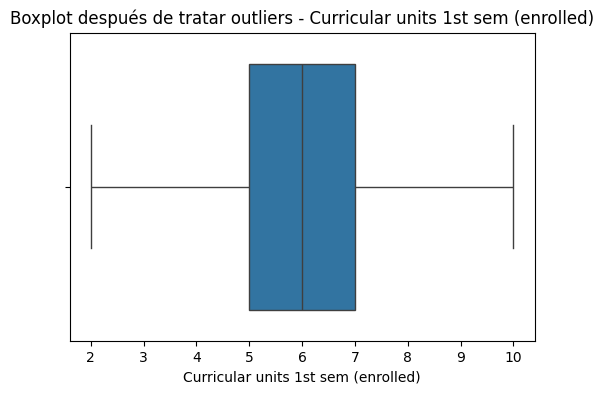

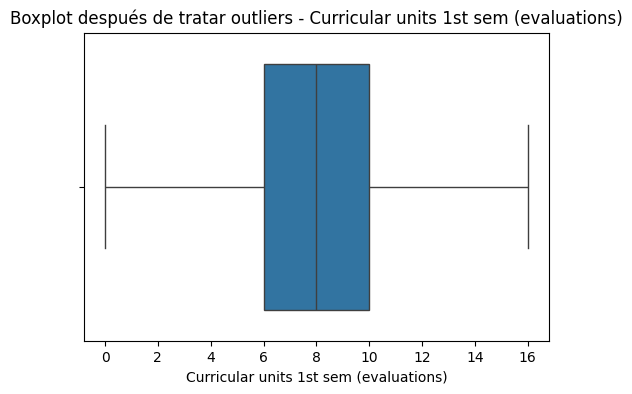

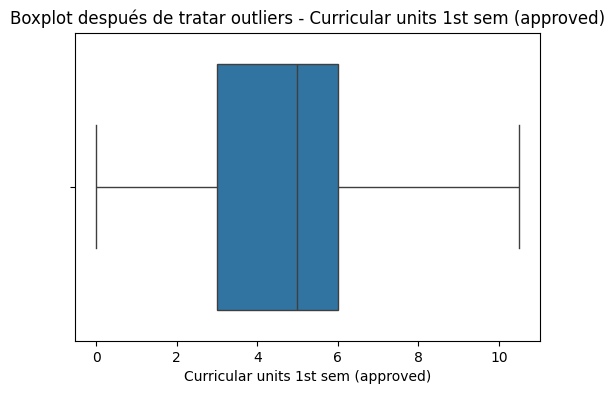

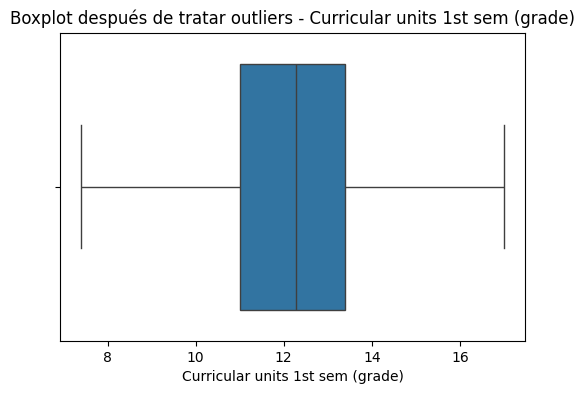

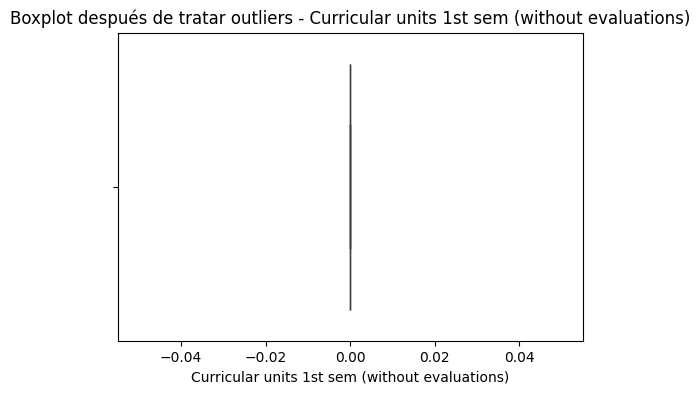

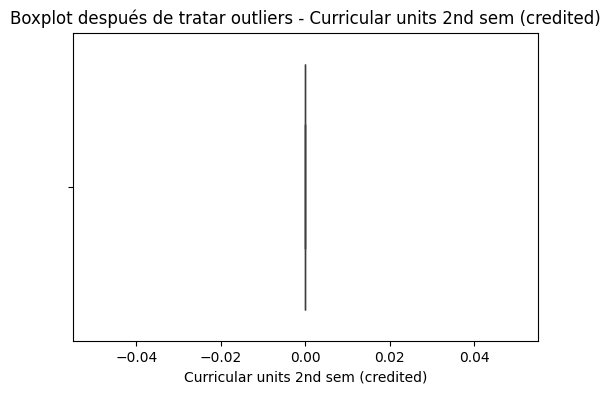

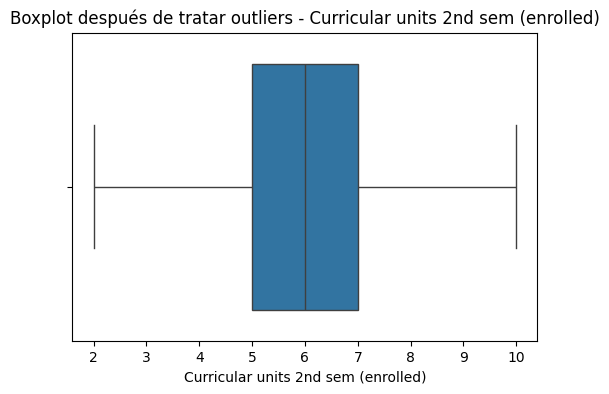

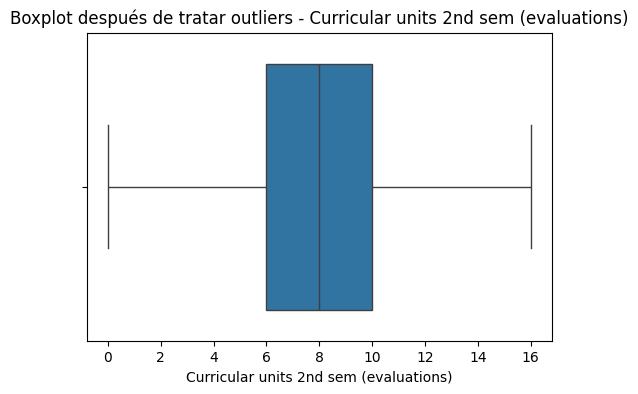

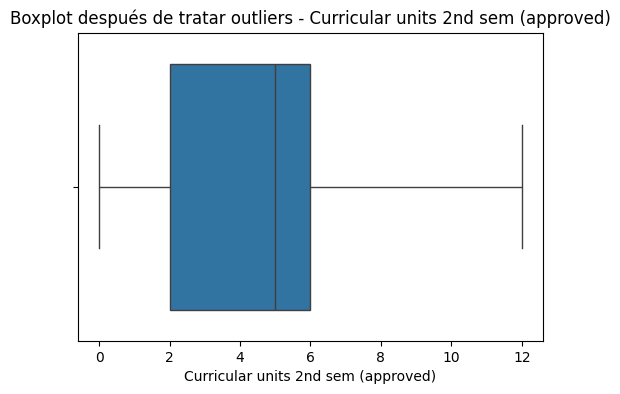

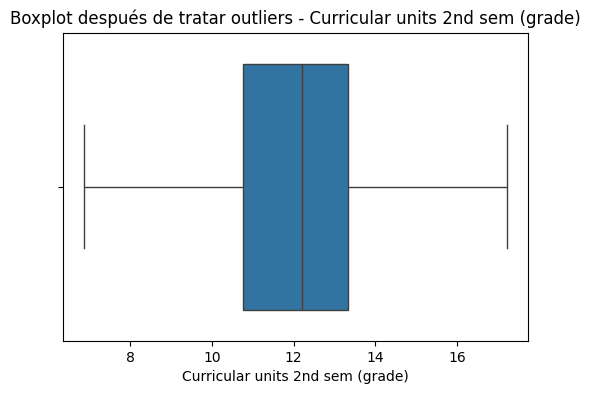

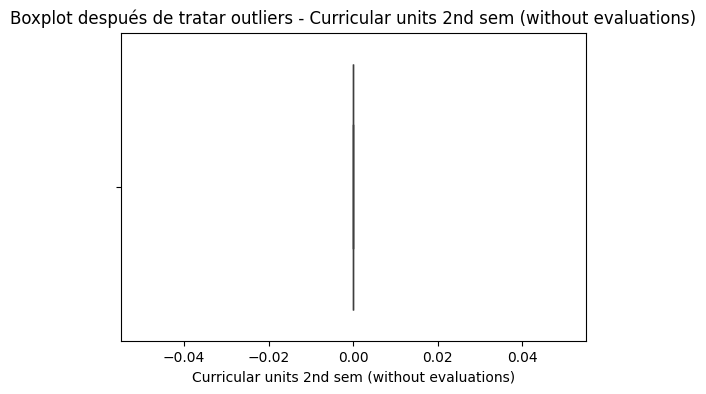

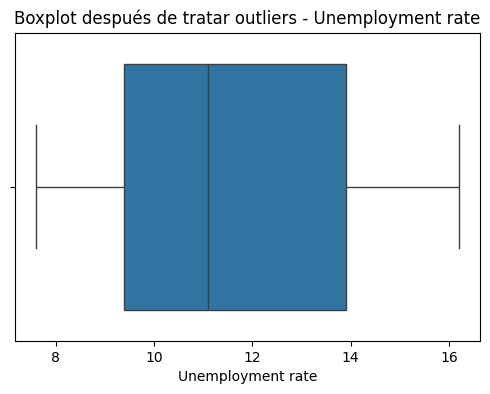

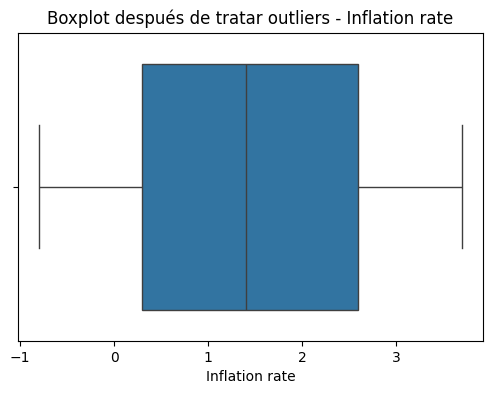

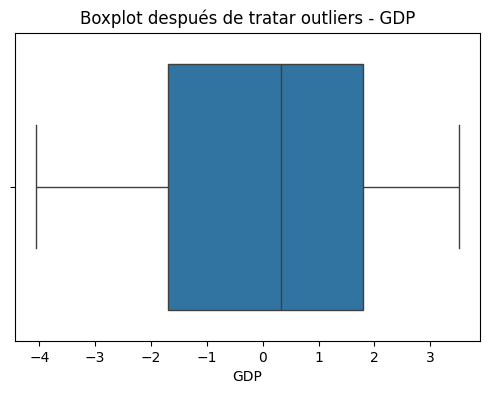

In [36]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot después de tratar outliers - {col}")
    plt.show()

Observamos que ya no tenemos valores atipicos